<a href="https://colab.research.google.com/github/dvogureckiy99/Fuzzy/blob/controll/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lifting and transport mechanism with two degrees of freedom of the transported cargo 

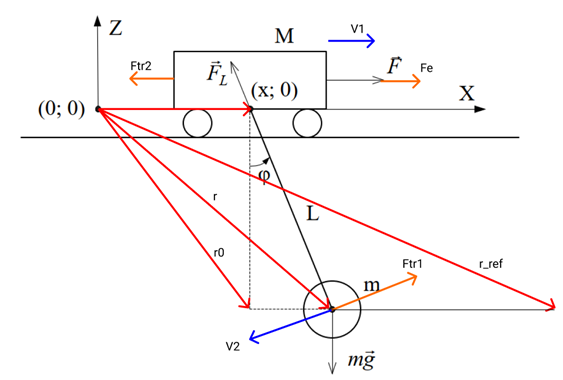

The simplest crane model is a pendulum on a carriage.

Model Parameters:
- $L$ — cable length; 
- $M$ — weight of the trolley; 
- $m$ — Cargo weight; 
- $\varphi$ — load deflection angle; 
- $x$ — distance from the center of the axis to the point of suspension of the load; 
- $F_e$ — the force generated by the electric drive acting on the trolley;
- $F_L$ — the force acting on the cable with the load from the side of the electric lifting drive;
- $r_0,r,r_{ref}$ — radius-vectors of the position of the center of the load initial, current, set respectively;
- $F_{tr1}$ — the force of viscous friction on the cargo air;
- $F_{tr2}$ — the force of viscous friction on the cargo air;
- $F$ $-$ the resulting force acting on the trolley.


## Automation of calculating the state space model of an object using the sympy package

In [ ]:
import sympy,math

# There are symbolic variables creating
m = sympy.symbols('m') 
M = sympy.symbols('M')
g = sympy.symbols('g')
L = sympy.symbols('L')
k1 = sympy.symbols('k1')
k2 = sympy.symbols('k2')
krf = sympy.symbols('krf') # friction of the cart on the surface
Fe = sympy.symbols('Fe')
x = sympy.symbols('x')
dx = sympy.symbols('dx')
phi = sympy.symbols('phi')
dphi = sympy.symbols('dphi')
ddx = sympy.symbols('ddx')
ddphi = sympy.symbols('ddphi')

## forces
# Frictional force at the point of attachment of the rope have appearancing when
# it's rotating, retarding the rope movement
# (conservative forces for the Lagrange equation for the first degree of freedom)
Mf1 = - k1 * dphi

Ff2 = - k2 * dx                   # Frictional force between cart and air expressed in absolute value (conservative forces)
N = (M + m) * g                   # support reaction
Frf = - krf * N                   # force have creating by the rolling friction 

T = m * (dx ** 2 + (L ** 2) * dphi ** 2 + 2 * dx * L * dphi * sympy.cos(phi)) / 2 + M * (dx ** 2) / 2 # total kinetic energy of the system T
V = - m * g * L * sympy.cos(phi)  # total potential energy of the system
L = T - V                         # setting the Lagrange function
print("L=", L)
#right side of the 1st Lagrange's equation or generalized force
Q1 = Fe + Ff2 + Frf
Q2 = Mf1
print("generalized forces:\n", "Q1=", Q1, "\nQ2=", Q2)

# System of Euler-Lagrange equations of the second kind
# the first equations in the system
dLddx = sympy.diff(L, dx)
print(dLddx)
dLdx = sympy.diff(L, x)
print("dL/dx=", dLdx)
ddLddxdt = (sympy.diff(dLddx, x) * dx + sympy.diff(dLddx, dx) * ddx + sympy.diff(dLddx, phi) * dphi + sympy.diff(dLddx, dphi) * ddphi)
print("d( dL/d(dx) )/dt=", ddLddxdt)
L1 = ddLddxdt - dLdx - Q1
print("L1=", L1, "=0")

# the second equation in the system
dLddphi = sympy.diff(L, dphi)
print("dL/d(dphi)=", dLddphi)
dLdphi = sympy.diff(L, phi)
print("dLdphi=", dLdphi)
ddLddphidt = (sympy.diff(dLddphi, x) * dx + sympy.diff(dLddphi, dx) * ddx + sympy.diff(dLddphi, phi) * dphi + sympy.diff(dLddphi, dphi) * ddphi)
print("d( dL/d(dphi) )/dt=", ddLddphidt)
L2 = ddLddphidt - dLdphi - Q2
print("L2=", L2, "=0")

# making sss with necessary state variables
ddphi = sympy.solve(L2, ddphi)
print("ddphi=", ddphi, "\n")
ddx = sympy.solve(L1.subs('ddphi', ddphi[0]), ddx)

# simplify
ddx = sympy.collect(ddx[0], -krf * g)
ddphi = ddphi[0]

# print
ddx_str = "ddx=" + str(ddx)
ddphi_str = "ddphi=" + str(ddphi)
print(ddx_str,"\n", ddphi_str)

L= L*g*m*cos(phi) + M*dx**2/2 + m*(L**2*dphi**2 + 2*L*dphi*dx*cos(phi) + dx**2)/2
generalized forces:
 Q1= Fe - dx*k2 - g*krf*(M + m) 
Q2= -dphi*k1
M*dx + m*(2*L*dphi*cos(phi) + 2*dx)/2
dL/dx= 0
d( dL/d(dx) )/dt= L*ddphi*m*cos(phi) - L*dphi**2*m*sin(phi) + ddx*(M + m)
L1= -Fe + L*ddphi*m*cos(phi) - L*dphi**2*m*sin(phi) + ddx*(M + m) + dx*k2 + g*krf*(M + m) =0
dL/d(dphi)= m*(2*L**2*dphi + 2*L*dx*cos(phi))/2
dLdphi= -L*dphi*dx*m*sin(phi) - L*g*m*sin(phi)
d( dL/d(dphi) )/dt= L**2*ddphi*m + L*ddx*m*cos(phi) - L*dphi*dx*m*sin(phi)
L2= L**2*ddphi*m + L*ddx*m*cos(phi) + L*g*m*sin(phi) + dphi*k1 =0
ddphi= [-ddx*cos(phi)/L - g*sin(phi)/L - dphi*k1/(L**2*m)] 

ddx=(Fe*L + L**2*dphi**2*m*sin(phi) - L*dx*k2 + L*g*m*sin(2*phi)/2 + dphi*k1*cos(phi) - g*krf*(L*M + L*m))/(L*(M + m*sin(phi)**2)) 
 ddphi=-ddx*cos(phi)/L - g*sin(phi)/L - dphi*k1/(L**2*m)


## Parsing equations

In [ ]:
# parser into the desired Latex format
def strtotex(strs):

   def replace_with_parentheses(str, str_find, str_raplace, str_parentheses):
      n_z = str.find(str_find)
      while n_z != (-1):
         n_frl = str.find(")", n_z)                             # the index of the first parenthesis that comes across ")"\
         n_ll = str.count("(", n_z + len(str_find), n_frl)      # number of open parentheses "("
         n_lll = str.find("(", n_z + len(str_find), n_frl)      # index of the last unclosed parenthesis "(" (last left line)
         while n_ll > 0:                                        # there are unclosed parentheses
            n_frl = str.find(")", n_frl + 1)                    # go to the index of the next bracket ")"
            n_ll = str.count("(", n_lll + 1, n_frl)             # update the number of unclosed parentheses "(", thereby approaching the end of the line
            n_lll = str.find("(", n_lll + 1, n_frl)             # jump to the index of the next parenthesis "("
         str = str[0:n_z] + str_raplace + str[n_z + len(str_find):n_frl] + str_parentheses + str[n_frl + 1:]
         n_z = str.find(str_find, n_z + 1) 
      return str

   strs = str(strs).replace("ddx", "\ddot{x}")
   strs = strs.replace("dx", "\dot{x}")
   strs = strs.replace("ddphi", "\ddot{phi}")
   strs = strs.replace("dphi", "\dot{phi}")
   strs = strs.replace("phi", "\\varphi") 
   strs = strs.replace("Fe", "F_e")
   strs = strs.replace("k1", "k_1")
   strs = strs.replace("k2", "k_2")
   strs = strs.replace("krf", "\\cfrac{k_{rf,max}}{v_{k_{rf,max}}} sat(\\cfrac{\dot{x}}{v_{k_{rf,max}} })")
   strs = replace_with_parentheses(strs, "**(", "^{ ", " }")
   strs = strs.replace("**", "^")
   strs = replace_with_parentheses(strs, "sqrt(", "\sqrt{ ", " }")
   strs = replace_with_parentheses(strs, "=(", "=\cfrac{ ", " }")
   strs = replace_with_parentheses(strs, "/(", "{ ", " }")
   strs = strs.replace("*", "")
   return strs

In [ ]:
# for report in the pdf format
ddx_str_tex = strtotex(ddx_str)
ddphi_str_tex = strtotex(ddphi_str)
print(ddx_str_tex)
print(ddphi_str_tex)

\ddot{x}=\cfrac{ F_eL + L^2\dot{\varphi}^2msin(\varphi) - L\dot{x}k_2 + Lgmsin(2\varphi)/2 + \dot{\varphi}k_1cos(\varphi) - g\cfrac{k_{rf,max}}{v_{k_{rf,max}}} sat(\cfrac{\dot{x}}{v_{k_{rf,max}} })(LM + Lm) }{ L(M + msin(\varphi)^2) }
\ddot{\varphi}=-\ddot{x}cos(\varphi)/L - gsin(\varphi)/L - \dot{\varphi}k_1{ L^2m }


In [ ]:
from IPython.display import Math
sss_tex = "\\begin{cases} " + ddx_str_tex + "\\\\ " + ddphi_str_tex + " \\end{cases}" 
Math(sss_tex)

<IPython.core.display.Math object>

In [ ]:
print(sss_tex)

\begin{cases} \ddot{x}=\cfrac{ F_eL + L^2\dot{\varphi}^2msin(\varphi) - L\dot{x}k_2 + Lgmsin(2\varphi)/2 + \dot{\varphi}k_1cos(\varphi) - g\cfrac{k_{rf,max}}{v_{k_{rf,max}}} sat(\cfrac{\dot{x}}{v_{k_{rf,max}} })(LM + Lm) }{ L(M + msin(\varphi)^2) }\\ \ddot{\varphi}=-\ddot{x}cos(\varphi)/L - gsin(\varphi)/L - \dot{\varphi}k_1{ L^2m } \end{cases}


## Preparing for start

In [ ]:
!pip install -U scikit-fuzzy

In [ ]:
  !pip install -U control

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import control as ct
from control.matlab import * # I want to have a MATLAB-like environment
import matplotlib.pyplot as plt

In [ ]:
# Define a generator for creating a plots
def system_dynamic_plot(sys, t, y, u, t_start_input=0, x_ref=0, linetype='b-',
                         subplots=[None, None, None], fig_size=None):
  #Figure out the plot bounds and indices
  from math import pi 
  x_min = 0; x_max = x_ref + math.ceil(x_ref * 0.05); x_ind = sys.find_state('x')
  phi_min = -30; phi_max = 30; phi_ind = sys.find_state('phi')
  Fe_min = 0; Fe_max = max(u); Fe_ind = sys.find_input('Fe') 

  #convert phi from rad to deg
  y_phi_ind = y[phi_ind] * 180 / pi

  # Make sure the upper and lower bounds on x are OK
  while max(y[x_ind]) > x_max: x_max += 1
  while min(y[x_ind]) < x_min: x_min -= 1
  
  # Make sure the upper and lower bounds on phi are OK
  while max(y_phi_ind) > phi_max: phi_max += 1
  while min(y_phi_ind) < phi_min: phi_min -= 1
  phi_max += 2
  phi_min -= 2

  # Make sure the upper and lower bounds on Fe are OK
  if len(u.shape) > 1:
    while max(u[Fe_ind]) > Fe_max: Fe_max += 1
    while min(u[Fe_ind]) < Fe_min: Fe_min -= 1
  else:
    while max(u) > Fe_max: Fe_max += 1
    while min(u) < Fe_min: Fe_min -= 1
  Fe_max += Fe_max*0.1

  # Create arrays for return values
  subplot_axes = subplots.copy()

  # Position profile
  if subplot_axes[0] is None:
    subplot_axes[0] = plt.subplot(3,1,1)
  else:
    plt.sca(subplots[0])
  plt.plot(t, y[x_ind], linetype)
  plt.plot(t, x_ref*np.ones(t.shape), 'k-')
  plt.plot([t_start_input, t_start_input], [x_min, x_max], 'k--')
  plt.axis([0, t[-1], x_min, x_max])
  plt.xlabel('Time $t$ [s]')
  plt.ylabel('Port crane \nposition $x$')
  plt.grid(color='0.5')
  
  # Angle phi profile
  if subplot_axes[1] is None:
    subplot_axes[1] = plt.subplot(3, 1, 2)
  else:
    plt.sca(subplots[1])
  plt.plot(t, y_phi_ind, linetype)
  plt.plot([t_start_input, t_start_input], [phi_min, phi_max], 'k--')
  plt.axis([0, t[-1], phi_min, phi_max])
  plt.xlabel('Time $t$ [s]')
  plt.ylabel('deflection of the\n rope angle\n $\phi$ in $\circ$')
  plt.grid(color='0.5')

  # Pulling force profile
  if subplot_axes[2] is None:
    subplot_axes[2] = plt.subplot(3, 1, 3)
  else:
    plt.sca(subplots[2])
  if len(u.shape) > 1:
    plt.plot(t, u[Fe_ind], linetype)
  else:
    plt.plot(t, u, linetype)
  plt.plot([t_start_input, t_start_input], [Fe_min, Fe_max], 'k--')
  plt.axis([0, t[-1], Fe_min, Fe_max])
  plt.xlabel('Time $t$ [s]')
  plt.ylabel('pulling force Fe,\n $Newton$')
  plt.grid(color='0.5')
  
  return subplot_axes

## Creating object dynamics

In [ ]:
def port_crane_updfcn(t, s, u, params):
  """ A port crane with a cargo on a rope dynamics (like object) 
      Model of the system has several frictions: rolling friction,
      frictional force between cart and air, Frictional force at the
      point of attachment of the rope
      we also assume that the cable is inextensible, i.e. L = const

  Parameters
  ----------
  s: array 
      System state: [x, dx, phi, dphi], where x is a port crane (object, or cart, or trolley) position
      in [0,200] [m], dx is velocity of the port crane in [m/s], phi is an angle
      of deflection of the rope with a container, which is a cargo and attached
      to the end of the rope in [-pi/2,pi/2] [rad], dphi is angular velocity of the rope 
      deflection in [rad/sec]

  u: array
      System inputs: [Fe], where Fe is a pulling force exerted on the
      cart, created by electric motor in [Newton]

  params : array
      System parameters, including ddx and ddphi thats calculating in the previous
      "Automation of calculating the state space model" steps

  Returns 
  -------
  float
      [dx, ddx, dphi, ddphi], where ddx is a port crane acceleration in m/s^2 and ddphi is 
      angular acceleration in rad/s^2
  """
  from math import sin,cos,sqrt,atan

  # Set up the system's parameters
  m = params.get('m', 400.)             # cargo mass in kg
  M = params.get('M', 3000.)            # port crane mass in kg
  g = params.get('g', 9.8)              # gravitational constant, m/s^2
  L = params.get('L', 30.)              # length of the drope in m
  k1 = params.get('k1', 8e4)            # static coefficient of friction acting on the rope in 1/kg
  k2 = params.get('k2',1.5e3)           # static coefficient of friction acting on cargo, it's include viscous friction air and dry friction and other that depend on speed in 1/kg
  krf_max = params.get('krf_max',3e-1)  #maximum of the coefficient for friction of the cart on the surface
  ddx = params.get('ddx')
  ddphi = params.get('ddphi')

  # Define variables for object state
  x = s[0]    # port crane position in m
  dx = s[1]   # velocity of the port crane in m/s
  phi = s[2]  # deflection of the rope angle in rad
  dphi = s[3] # angular velocity of the rope deflection in rad/sec

  #Define variables for object inputs
  Fe = u[0]   # pulling force exerted on the trolley in Newtons

  v_krf_max = 2 # setting the speed in m / s corresponding to the moment in time when the rolling friction value is established
  saturation = ct.saturation_nonlinearity(v_krf_max) # non-linearity for rolling friction
  krf = (krf_max/v_krf_max) * saturation(dx)

  # calculating the output variables
  vddx = ddx.evalf(subs={'m':m,'M':M,'g':g,'L':L,'k1':k1,'k2':k2,'x':x,'dx':dx,'phi':phi,'dphi':dphi,'Fe':Fe,'krf':krf})
  vddphi = ddphi.evalf(subs={'m':m,'M':M,'g':g,'L':L,'k1':k1,'k2':k2,'x':x,'dx':dx,'ddx':vddx,'phi':phi,'dphi':dphi,'Fe':Fe,'krf':krf})
  
  return np.array([dx, vddx, dphi, vddphi])

def port_crane_outfcn(t, s, u, params):
  return s[0:4]

## State space fuzzy-controller

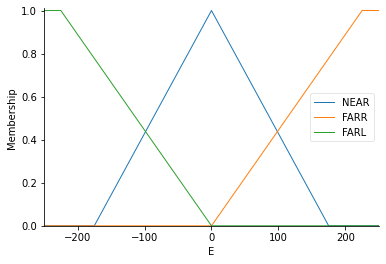

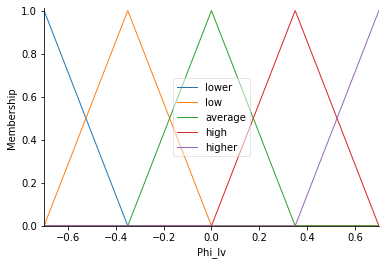

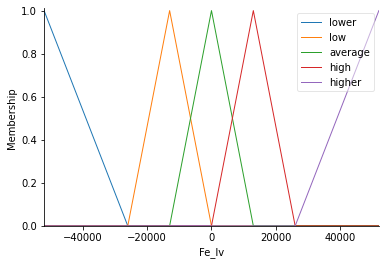

In [ ]:
# Parameters for modeling the system
x_zad = 250 # in m

#Fuzzy regulator parameters init
Fe_abs = 5.2e4 # maximum value of control Fe
Fe_min = -Fe_abs
Fe_max = Fe_abs

# New Antecedent/Consequent objects hold universe variables and
# continues membership functions
N = 1e3       # count of point for the universe
E_delta = 0.7 # coefficient of reflaction x coordinate from x_zad in x_zad percentage 
E = ctrl.Antecedent(np.linspace(-x_zad, x_zad, int(N+1)), 'E') # input in m with 
Phi_lv = ctrl.Antecedent(np.linspace(-40*math.pi/180, 40*math.pi / 180, int(N + 1)), 'Phi_lv') # in rad
Fe_lv = ctrl.Consequent(np.linspace(Fe_min, Fe_max, int(N + 1)), 'Fe_lv')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
cuant = ['lower', 'low', 'average', 'high', 'higher']
cuantE = ['NEAR', 'FARR', 'FARL']
E[cuantE[0]] = fuzz.trimf(E.universe, [-E_delta * x_zad, 0, E_delta * x_zad])
E[cuantE[1]] = fuzz.trapmf(E.universe, [0, x_zad * 0.9, x_zad, x_zad])
E[cuantE[2]] = fuzz.trapmf(E.universe, [-x_zad, -x_zad, -x_zad * 0.9, 0])
Fe_lv[cuant[0]] = fuzz.trimf(Fe_lv.universe, [Fe_min, Fe_min, Fe_min * 0.5])
Fe_lv[cuant[1]] = fuzz.trimf(Fe_lv.universe, [Fe_min * 0.5, Fe_min * 0.25, 0])
Fe_lv[cuant[2]] = fuzz.trimf(Fe_lv.universe, [Fe_min * 0.25, 0, Fe_max * 0.25])
Fe_lv[cuant[3]] = fuzz.trimf(Fe_lv.universe, [0,Fe_max * 0.25, Fe_max * 0.5])
Fe_lv[cuant[4]] = fuzz.trimf(Fe_lv.universe, [Fe_max * 0.5, Fe_max, Fe_max])
# Auto-membership function population 
Phi_lv.automf(5, 'cuant')

E.view()
Phi_lv.view()
Fe_lv.view()

# creating a fuzzy system rule base
rule1 = ctrl.Rule(Phi_lv[cuant[0]] & E[cuantE[0]] , Fe_lv[cuant[0]])
rule2 = ctrl.Rule(Phi_lv[cuant[1]] & E[cuantE[0]], Fe_lv[cuant[0]])
rule3 = ctrl.Rule(Phi_lv[cuant[2]] & E[cuantE[0]], Fe_lv[cuant[2]])
rule4 = ctrl.Rule(Phi_lv[cuant[3]] & E[cuantE[0]], Fe_lv[cuant[4]])
rule5 = ctrl.Rule(Phi_lv[cuant[4]] & E[cuantE[0]], Fe_lv[cuant[4]])
rule6 = ctrl.Rule(E[cuantE[1]], Fe_lv[cuant[4]])
rule7 = ctrl.Rule(E[cuantE[2]], Fe_lv[cuant[0]])

# Control System Creation 
sys_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4 , rule5, rule6, rule7])
sys_sim = ctrl.ControlSystemSimulation(sys_ctrl)


In [ ]:
# Input/ouput model for the object
sys_object = ct.NonlinearIOSystem(port_crane_updfcn, port_crane_outfcn, 
                   inputs = ('Fe'), outputs = None, states=('x', 'dx', 'phi', 'dphi'),
                   name='sys_object',params={})

## Changed nonlinearsystem library

In [ ]:

def _rhs(self, t, x, u):
    xdot = self.updfcn(t, x, u, self._current_params) \
        if self.updfcn is not None else []
    return np.array(xdot).reshape((-1,))

def _out(self, t, x, u):
    y = self.outfcn(t, x, u, self._current_params) \
        if self.outfcn is not None else x
    return np.array(y).reshape((-1,))

#input_output_response

def _check_convert_array(in_obj, legal_shapes, err_msg_start, squeeze=False,
                         transpose=False):
  # convert nearly everything to an array.
    out_array = np.asarray(in_obj)
    if (transpose):
        out_array = np.transpose(out_array)

    # Test element data type, elements must be numbers
    legal_kinds = set(("i", "f", "c"))  # integer, float, complex
    if out_array.dtype.kind not in legal_kinds:
        err_msg = "Wrong element data type: '{d}'. Array elements " \
                  "must be numbers.".format(d=str(out_array.dtype))
        raise TypeError(err_msg_start + err_msg)

    # If array is zero dimensional (in_obj is scalar):
    # create array with legal shape filled with the original value.
    if out_array.ndim == 0:
        for s_legal in legal_shapes:
            # search for shape that does not contain the special symbol any.
            if "any" in s_legal:
                continue
            the_val = out_array[()]
            out_array = np.empty(s_legal, 'd')
            out_array.fill(the_val)
            break

    # Test shape
    def shape_matches(s_legal, s_actual):
        """Test if two shape tuples match"""
        # Array must have required number of dimensions
        if len(s_legal) != len(s_actual):
            return False
        # All dimensions must contain required number of elements. Joker: "all"
        for n_legal, n_actual in zip(s_legal, s_actual):
            if n_legal == "any":
                continue
            if n_legal != n_actual:
                return False
        return True

    # Iterate over legal shapes, and see if any matches out_array's shape.
    for s_legal in legal_shapes:
        if shape_matches(s_legal, out_array.shape):
            break
    else:
        legal_shape_str = " or ".join([str(s) for s in legal_shapes])
        err_msg = "Wrong shape (rows, columns): {a}. Expected: {e}." \
                  .format(e=legal_shape_str, a=str(out_array.shape))
        raise ValueError(err_msg_start + err_msg)

    # Convert shape
    if squeeze:
        out_array = np.squeeze(out_array)
        # We don't want zero dimensional arrays
        if out_array.shape == tuple():
            out_array = out_array.reshape((1,))

    return out_array

def _update_params(self, params, warning=False):
  # Update the current parameter values
  self._current_params = self.params.copy()
  self._current_params.update(params)

def _find_size(sysval, vecval):
    """Utility function to find the size of a system parameter
    If both parameters are not None, they must be consistent.
    """
    if hasattr(vecval, '__len__'):
        if sysval is not None and sysval != len(vecval):
            raise ValueError("Inconsistend information to determine size "
                             "of system component")
        return len(vecval)
    # None or 0, which is a valid value for "a (sysval, ) vector of zeros".
    if not vecval:
        return 0 if sysval is None else sysval
    elif sysval == 1:
        # (1, scalar) is also a valid combination from legacy code
        return 1
    raise ValueError("Can't determine size of system component.")

def _process_time_response(
        sys, tout, yout, xout, u,transpose=None, return_x=False,return_t_u_y = False,
        squeeze=None, input=None, output=None):
      # If squeeze was not specified, figure out the default (might remain None)
    if squeeze is None:
        squeeze = config.defaults['control.squeeze_time_response']

    # Determine if the system is SISO
    issiso = sys.issiso() or (input is not None and output is not None)

    # Figure out whether and how to squeeze output data
    if squeeze is True:         # squeeze all dimensions
        yout = np.squeeze(yout)
    elif squeeze is False:      # squeeze no dimensions
        pass
    elif squeeze is None:       # squeeze signals if SISO
        if issiso:
            if len(yout.shape) == 3:
                yout = yout[0][0]       # remove input and output
            else:
                yout = yout[0]          # remove input
    else:
        raise ValueError("unknown squeeze value")

    # Figure out whether and how to squeeze the state data
    if issiso and xout is not None and len(xout.shape) > 2:
        xout = xout[:, 0, :]            # remove input

    # See if we need to transpose the data back into MATLAB form
    if transpose:
        # Transpose time vector in case we are using np.matrix
        tout = np.transpose(tout)

        # For signals, put the last index (time) into the first slot
        yout = np.transpose(yout, np.roll(range(yout.ndim), 1))
        if xout is not None:
            xout = np.transpose(xout, np.roll(range(xout.ndim), 1))

    # Return time, output, and (optionally) state
    if return_x: 
      return (yout, xout) 
    elif return_t_u_y:  
      return (tout, u, yout)
    else:
      return (yout)

def input_output_response(
        sys, T, x_zad=0., X0=0, params={'ddx': ddx, 'ddphi': ddphi},
        transpose=False, return_t_u_y=False, squeeze=None,Fuzzy_regulator=None,
        solve_ivp_kwargs={}, **kwargs):
  """Compute the output response of a system to a given input.'''
  """

  if solve_ivp_kwargs.get('method', None) is None:
    solve_ivp_kwargs['method'] = 'RK23'

  # Compute the time interval and number of steps
  T0, Tf = T[0], T[-1]
  n_steps = len(T)  
  dt = T[1]-T[0]
  # Update the parameter values
  sys._update_params(params)
  
  global U, Tnew
  U = []
  Tnew = []
  def ufun(t, x):
    global U,Tnew
    Tnew = np.append(Tnew, t)
    sys_sim.input['E'] = x_zad-x[0] # ошибка по координате
    sys_sim.input['Phi_lv'] = x[2]  # ошибка по углу отклонения
    sys_sim.compute()
    U = np.append(U, sys_sim.output['Fe_lv'])
    return [U[-1]]
  

  # Create a lambda function for the right hand side
  def ivp_rhs(t, x):
    return sys._rhs(t, x, ufun(t,x))

  if not hasattr(sp.integrate, 'solve_ivp'):
    raise NameError("scipy.integrate.solve_ivp not found; "
                        "use SciPy 1.0 or greater")
  soln = sp.integrate.solve_ivp(
      ivp_rhs, (T0, Tf), X0, t_eval=T, max_step=dt*1e3,
      vectorized=False, **solve_ivp_kwargs)

  U = np.interp(T, Tnew, U)

  if sys.ninputs is None or sys.ninputs == 1:
      legal_shapes = [(n_steps,), (1, n_steps)]
  else:
      legal_shapes = [(sys.ninputs, n_steps)]

  # Compute the output associated with the state (and use sys.out to
  # figure out the number of outputs just in case it wasn't specified)
  y = np.zeros((np.shape(sys._out(Tnew[0], X0, x_zad))[0], len(T)))
  u = U[0] if len(U.shape) == 1 else U[:, 0]
  for i in range(len(T)):
    u = U[i] if len(U.shape) == 1 else U[:, i]
    y[:, i] = sys._out(T[i], soln.y[:, i], u )
                       
  return _process_time_response(sys, T, y, soln.y,U, transpose=transpose,
                                  return_t_u_y=return_t_u_y, squeeze=squeeze)

## Define the generator for simulating an system with Fuzzy-controller


0.0
1e-06
4.9999999999999996e-05
7.5e-05
9.999999999999999e-05
0.0006000000000000001
0.0008500000000000001
0.0011
0.0061
0.0086
0.0111
0.019195860754290334
0.023243791131435498
0.02729172150858066
0.039458251542975525
0.04554151656017296
0.051624781577370396
0.0692745233568039
0.07809939424652065
0.0869242651362374
0.11107867480135439
0.12315587963391288
0.13523308446647136
0.16725434430431746
0.18326497422324053
0.19927560414216358
0.23130981167959636
0.24732691544831276
0.26334401921702916
0.3368263289734794
0.3735674838517046
0.41030863872992973
0.5068791129825703
0.5551643501088905
0.6034495872352108
0.7265972905575995
0.7881711422187938
0.8497449938799881
1.002946291043727
1.0795469396255966
1.1561475882074659
1.3426456667588167
1.4358947060344922
1.5291437453101677
1.7492651208811152
1.859325808666589
1.9693864964520627
2.215426979134042
2.338447220475032
2.4614674618160217
2.7242422461143074
2.8556296382634505
2.987017030412593
3.2583766787402664
3.394056502904103
3.529736327067

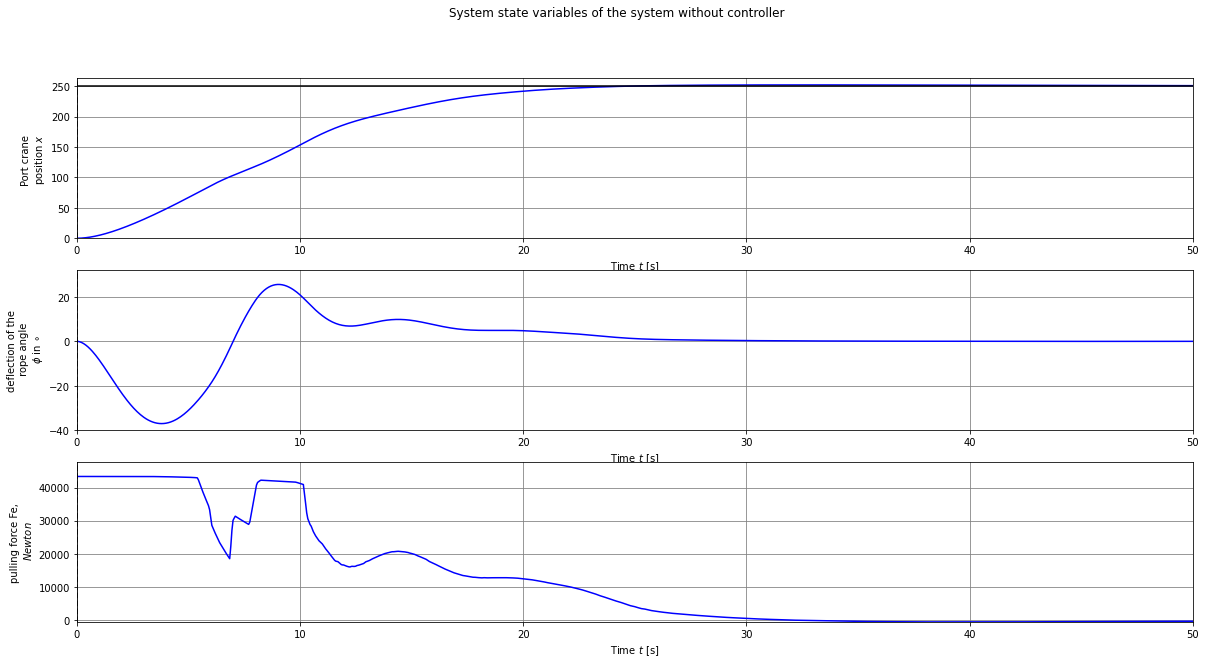

In [ ]:
import scipy as sp
# Define the time and input vectors
time_start_force=0
T_N=int(1e3+1) #points for simulation
time_interval_stop = 50 # length of time interval in sec 
time_application_of_force = 10

T = np.linspace(0, time_interval_stop, (T_N))
N_time_start_force = math.ceil((time_start_force/time_interval_stop)*(T_N))

N_time_application_of_force = math.ceil((time_application_of_force/time_interval_stop)*(T_N))

sys_initial_state = np.array([[0],[0],[0],[0]]) 
(tout, u, sys_state) = input_output_response(sys_object, T, x_zad,  sys_initial_state[0:4,0],
                                  params={'ddx': ddx, 'ddphi': ddphi}, Fuzzy_regulator=sys_sim, return_t_u_y=True)   
# create graphics
figsize=(20,10)
plt.figure(figsize=figsize)  
subplots = system_dynamic_plot(sys_object, tout, sys_state, u=u ,x_ref=x_zad,
         t_start_input=time_start_force, linetype='-b',fig_size=figsize)

# Add title and legend
plt.suptitle('System state variables of the system without controller')
import matplotlib.lines as mlines
pi_line = mlines.Line2D([], [], color='blue', linestyle='-', label='without controller')

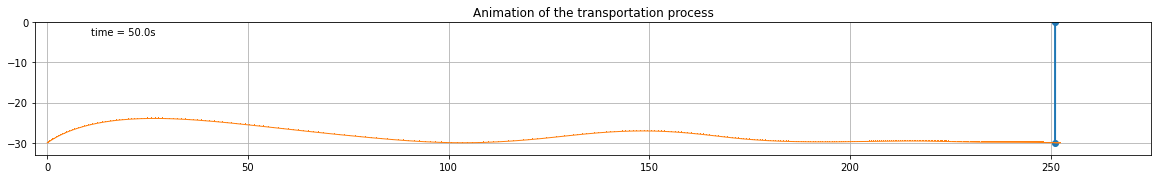

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from collections import deque
rc('animation', html='html5')

L=30.

figsize=(20,10)
fig = plt.figure(figsize=figsize)  
ax = fig.add_subplot( xlim=(-L*0.1, x_zad*1.1), ylim=(-L*1.1, 0))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], ',-', lw=1)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_len = T_N  # how many trajectory points to display
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)

 # animation function
def animate(i):
  # adding new points to the axis point list x, y
  x=sys_state[0,i]
  phi=sys_state[2,i]
  x_cart=x
  y_cart=0
  x_cargo=math.sin(phi)*L+x
  y_cargo=-math.cos(phi)*L

  thisx = [x_cart, x_cargo]
  thisy = [y_cart, y_cargo]

  if i == 0:
    history_x.clear()
    history_y.clear()

  history_x.appendleft(thisx[1])
  history_y.appendleft(thisy[1])

  line.set_data(thisx, thisy)
  trace.set_data(history_x, history_y)
  time_text.set_text(time_template % T[i])
  return line, trace, time_text

# Заголовок анимации
plt.title('Animation of the transportation process')

# Вызов анимации.
anim = animation.FuncAnimation(fig, animate,
                               frames= T_N, interval=time_interval_stop, blit=True)
anim.save('SystemMotion.gif', writer = "pillow", fps=np.ceil(T_N*(1/time_interval_stop)) )